## Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
p_fair = np.array((0.5, 0.5))
p_trick = np.array((0.6, 0.4))
LR = np.log(p_trick/p_fair)

In [3]:
def run_decision_process(LR, p, highB=1, lowB=-1, bias=0):
    cur = bias
    steps = [cur]
    while (cur < highB) and (cur > lowB):
        toss = np.random.choice(range(len(p)), p=p)
        cur += LR[toss]
        steps.append(cur)
    return steps

In [4]:
def decision(t):
    return t[-1] > 0

In [5]:
fair_results = [run_decision_process(LR, p_fair) for i in range(10)]
trick_results = [run_decision_process(LR, p_trick) for i in range(10)]

In [6]:
def results_figure(results, title, highB=1, lowB=-1):
    fig = plt.figure()
    mpl.rc('font', size=30)
    fig.set_size_inches((40, 30), forward=True)
    plt.axhline(highB, c='k', linestyle='--')
    plt.axhline(lowB, c='k', linestyle='--')
    for i, r in enumerate(results):
        plt.plot(r, label=f'trial {i+1}')
        plt.scatter(len(r)-1, r[-1], s=70)
    plt.legend()
    plt.title(title)
    plt.xlabel('Toss number')
    plt.ylabel('Cumulative logLR')
    plt.text(-1.5, 1.01, 'Trick threshold')
    plt.text(-1.5, -1.04, 'Fair threshold')
    return fig

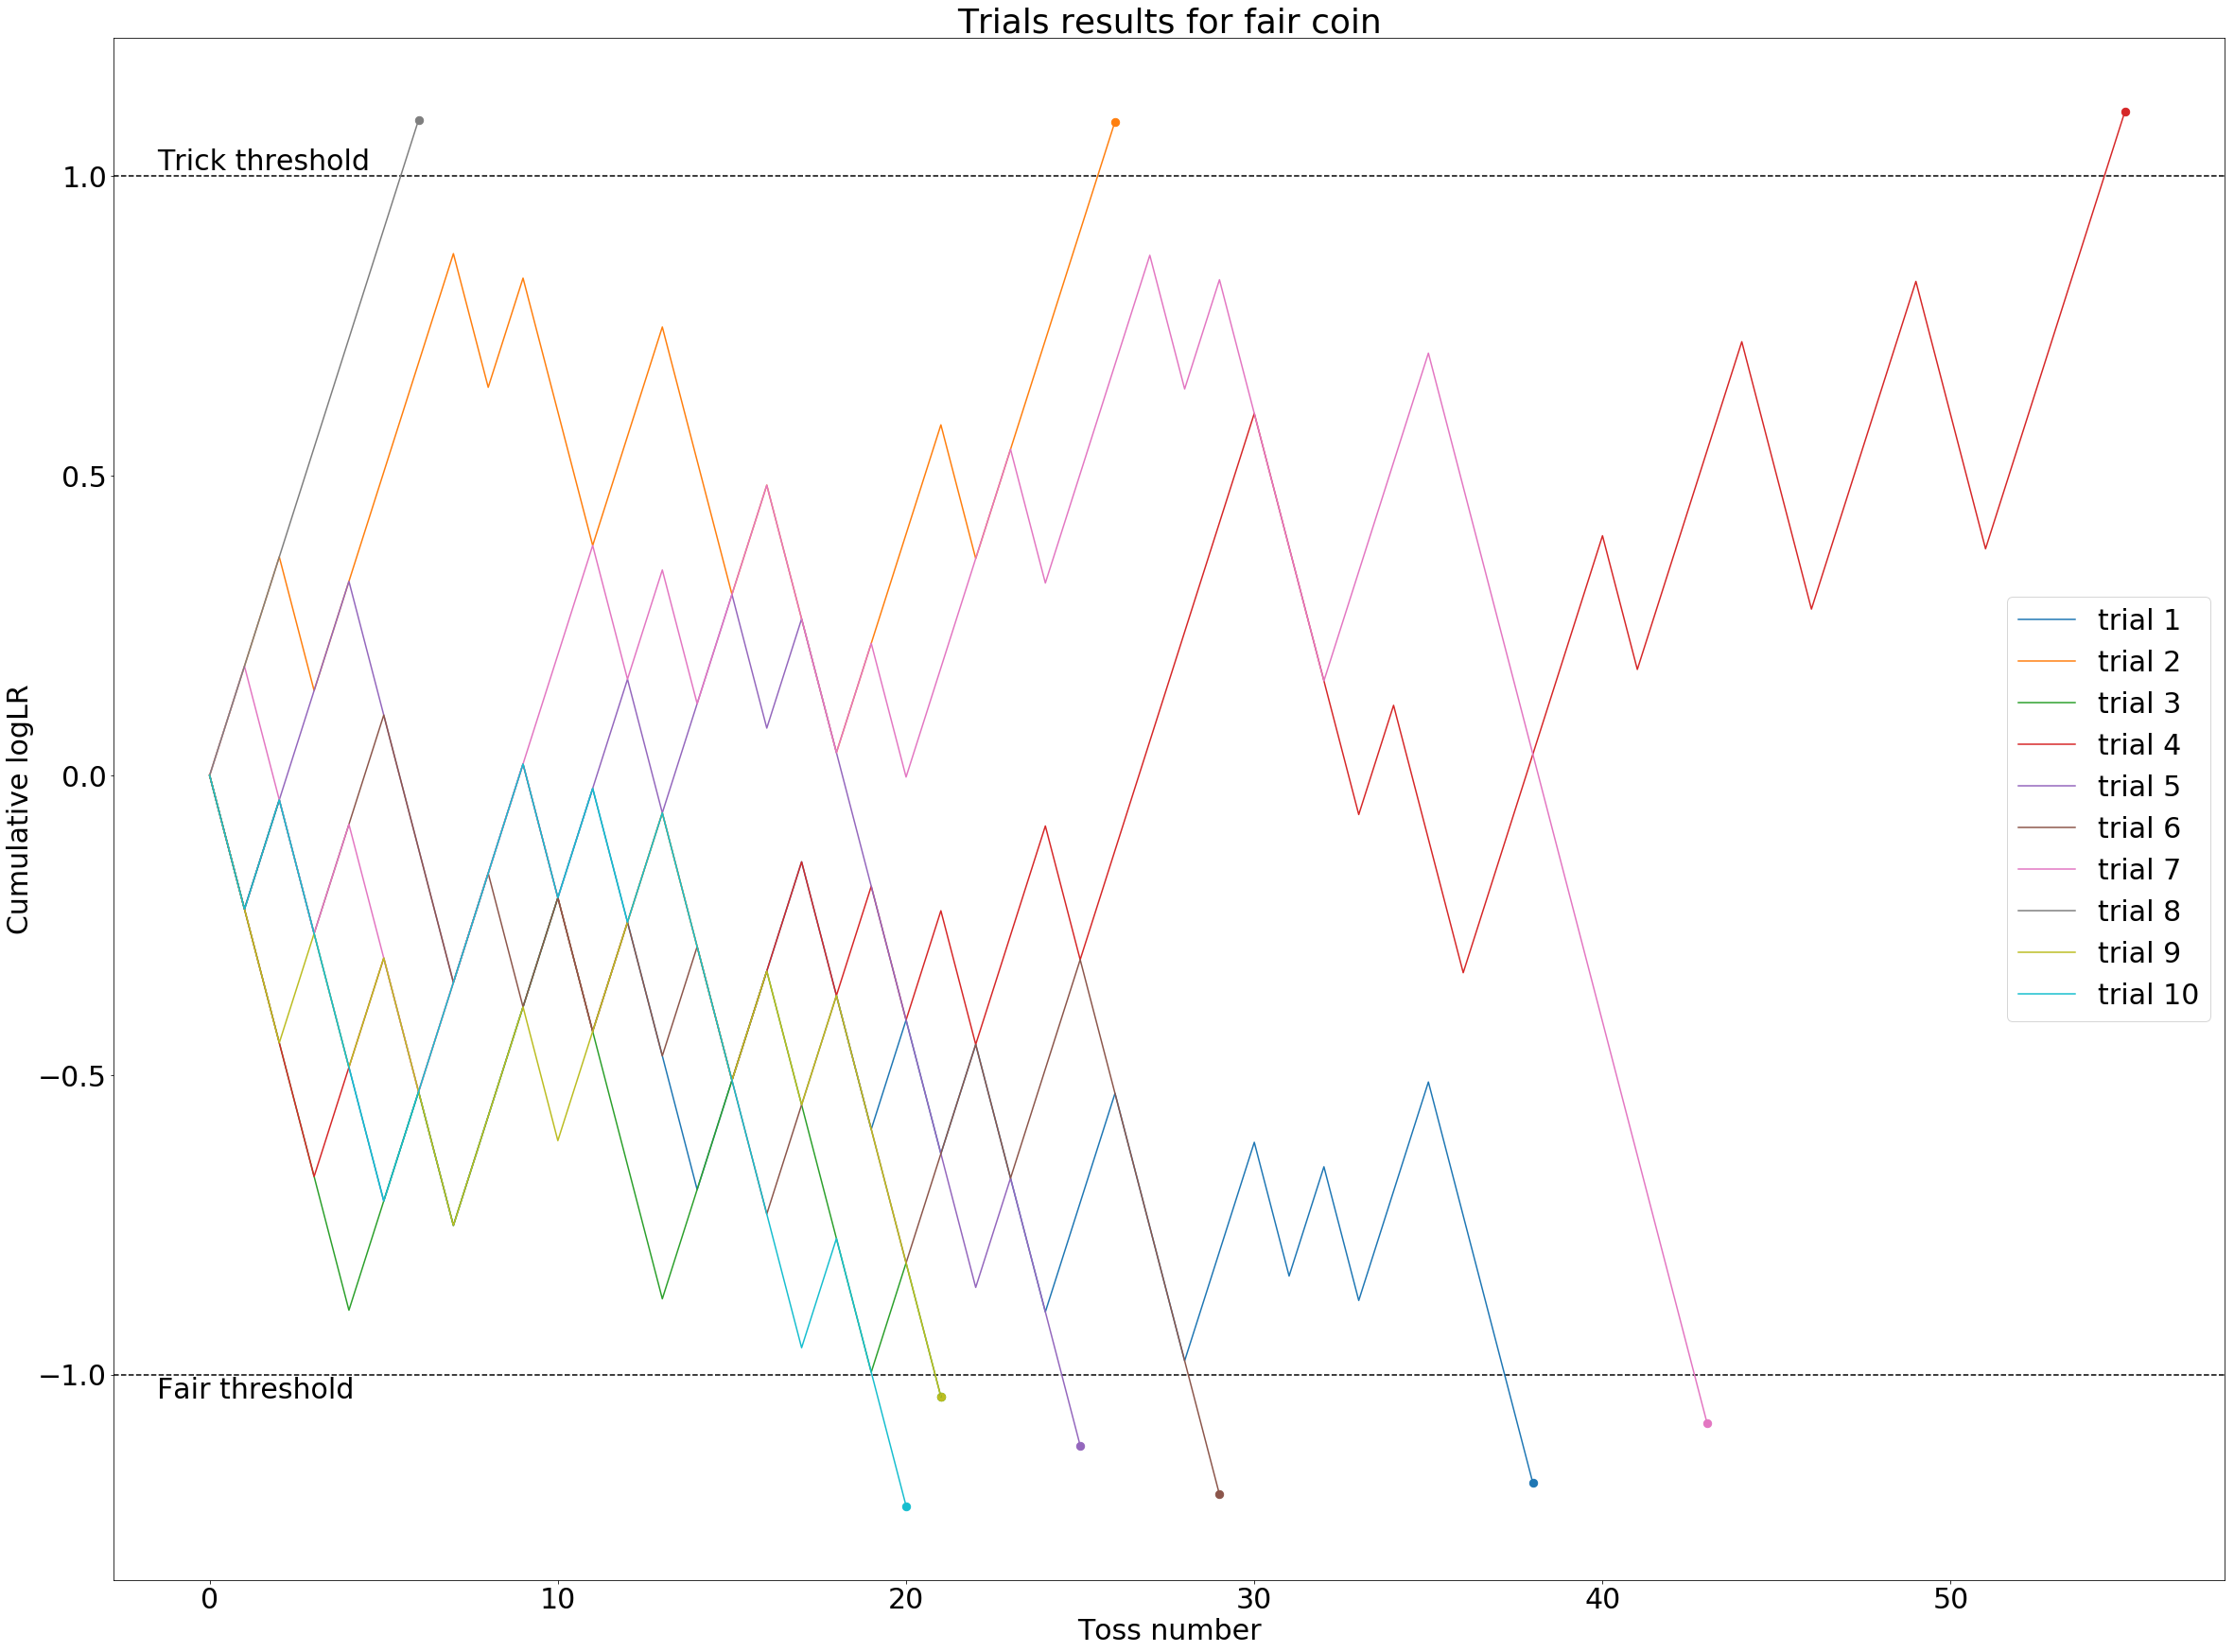

In [7]:
fig = results_figure(fair_results, 'Trials results for fair coin')

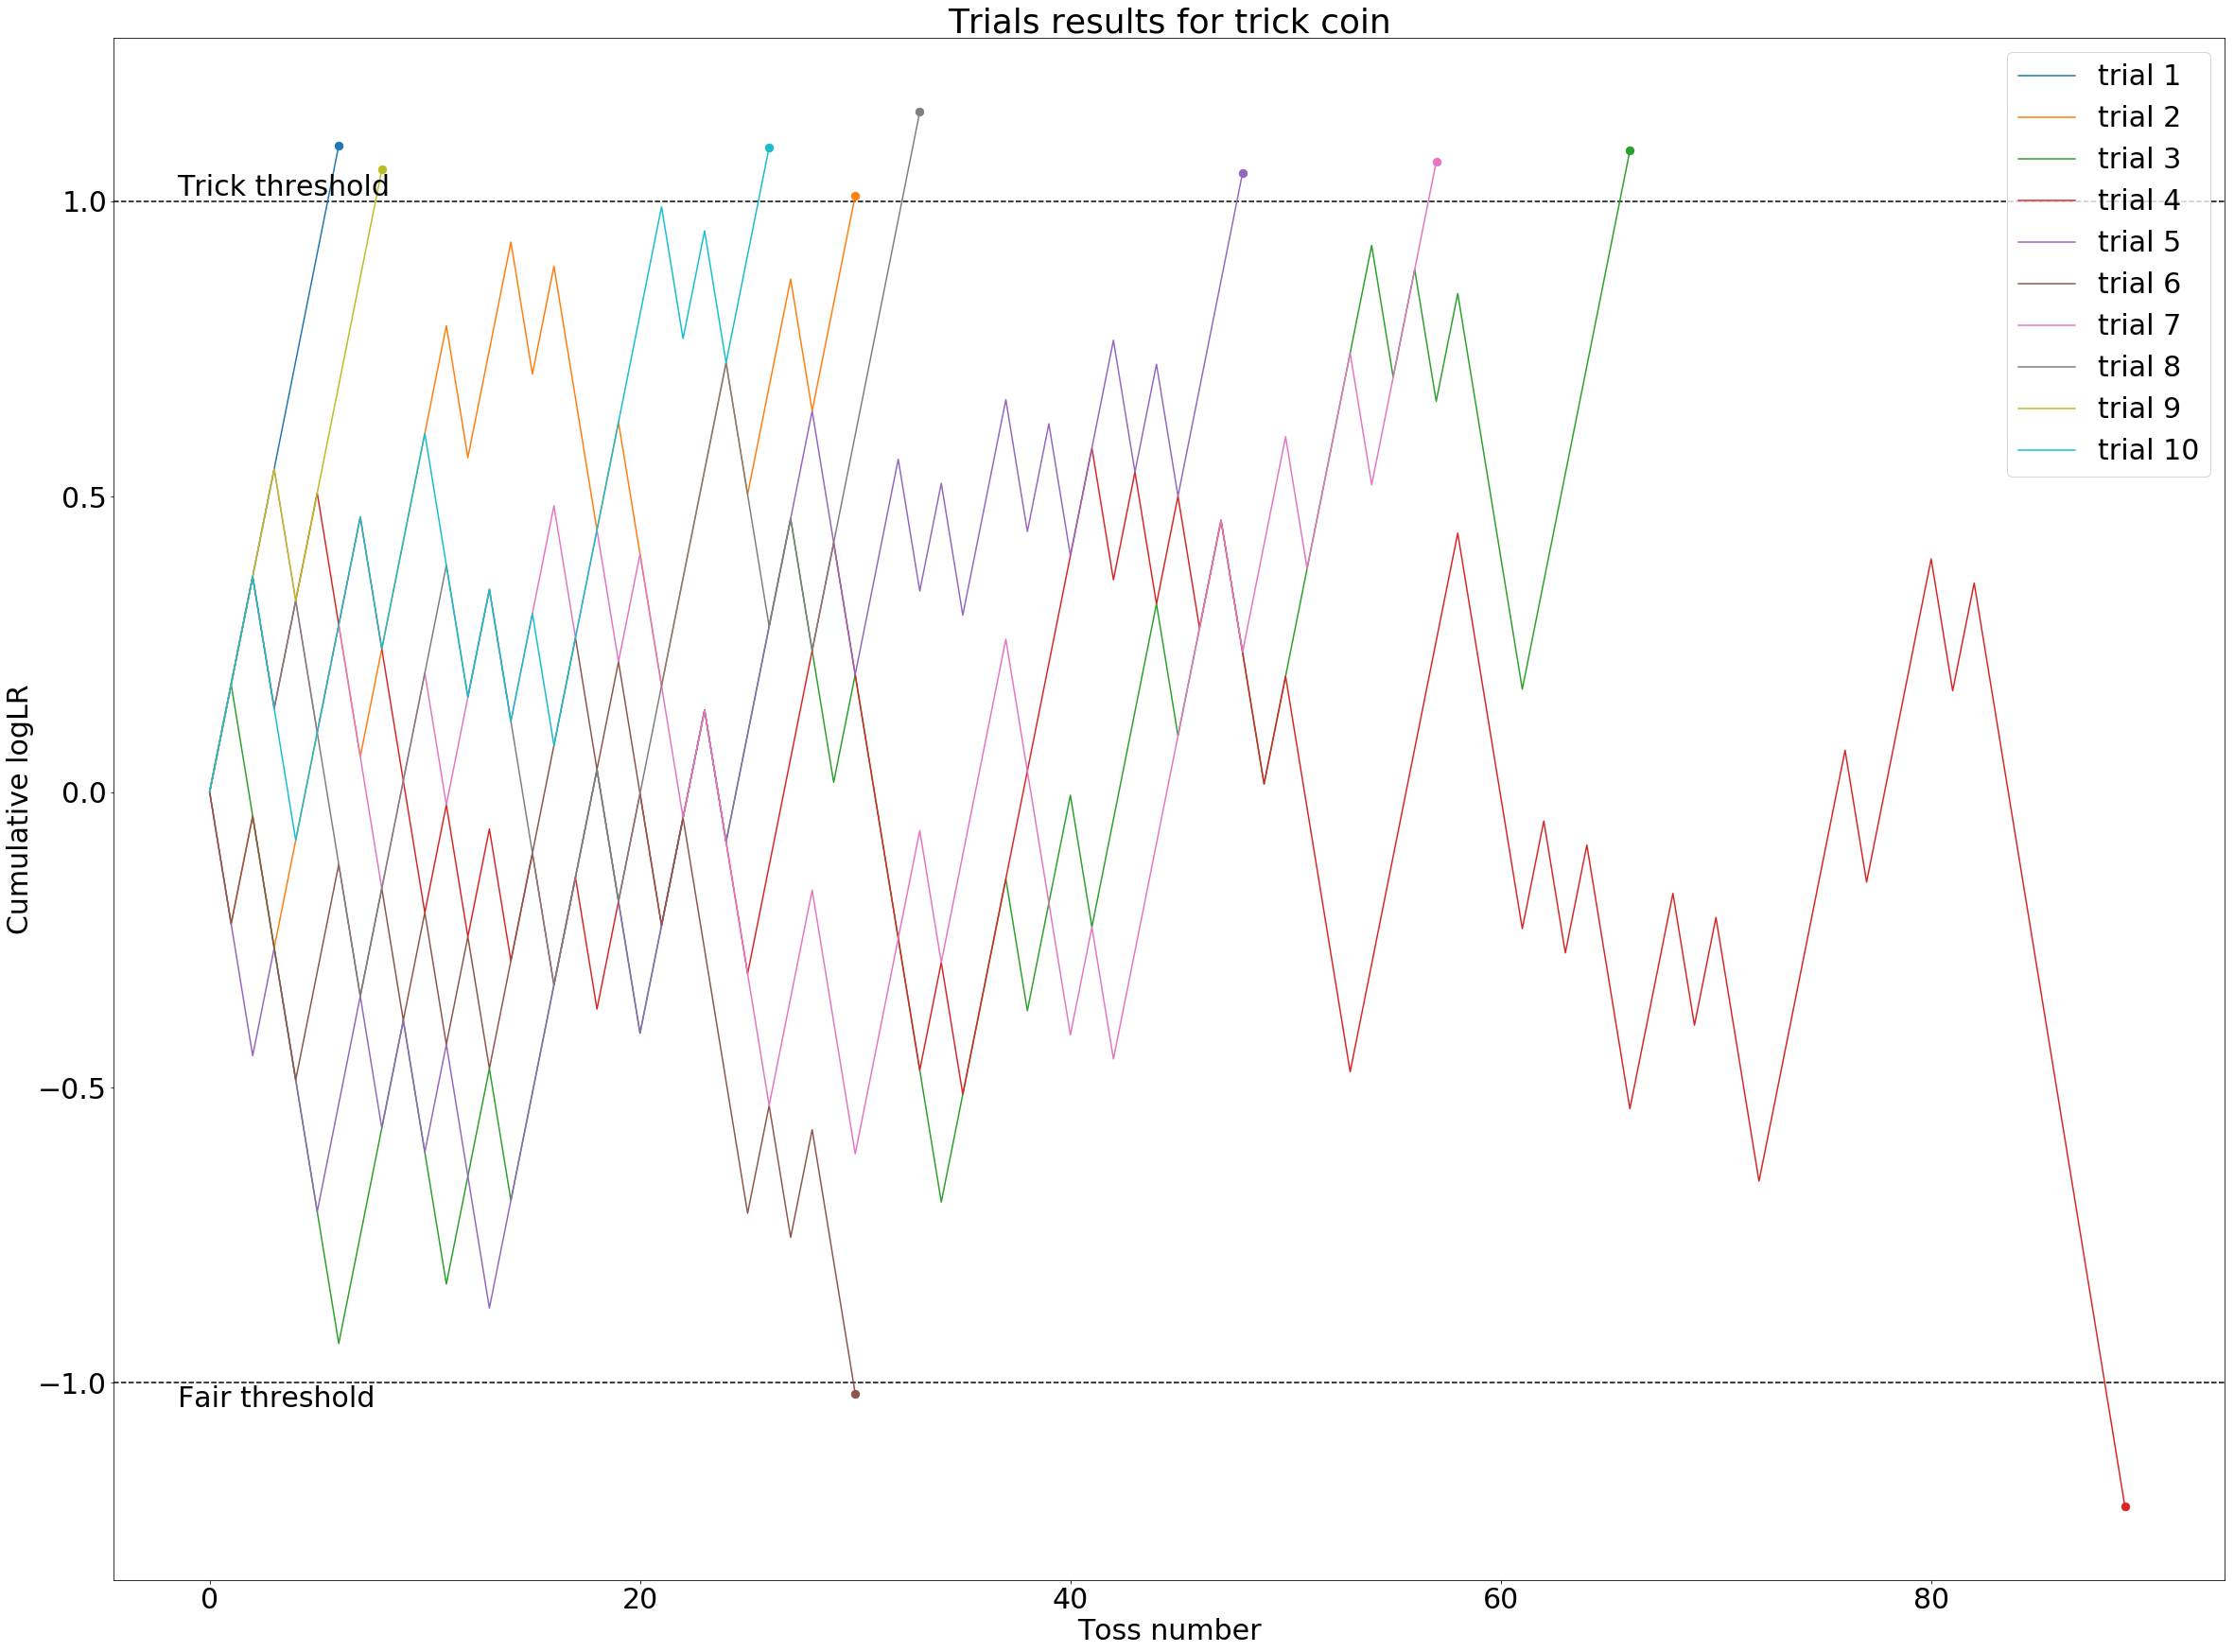

In [8]:
fig = results_figure(trick_results, 'Trials results for trick coin')

In [9]:
def report_errors(B, iterations=200):
    fair_results = [run_decision_process(LR, p_fair, highB=B, lowB=-B) for i in range(iterations)]
    trick_results = [run_decision_process(LR, p_trick, highB=B, lowB=-B) for i in range(iterations)]
    fair_decisions = np.array(list(map(decision, fair_results)))
    trick_decisions = np.array(list(map(decision, trick_results)))
    false_positive = np.mean(fair_decisions)
    false_negative = 1 - np.mean(trick_decisions)
    
    return false_positive, false_negative

In [11]:
report_errors(1)

(0.285, 0.27)

In [12]:
report_errors(2)

(0.13, 0.07499999999999996)

## Exercise 2

In [13]:
Tmax = 2
dt = 0.0001
slope = 10

In [14]:
def diffusion_process(mean, variance, size):
    increments = np.random.normal(loc=mean, scale=np.sqrt(variance), size=size)
    x = np.cumsum(increments)
    
    return x

In [15]:
ts = np.arange(0, Tmax, dt) + dt
drift = slope * ts
x = diffusion_process(slope * dt, dt, ts.size)

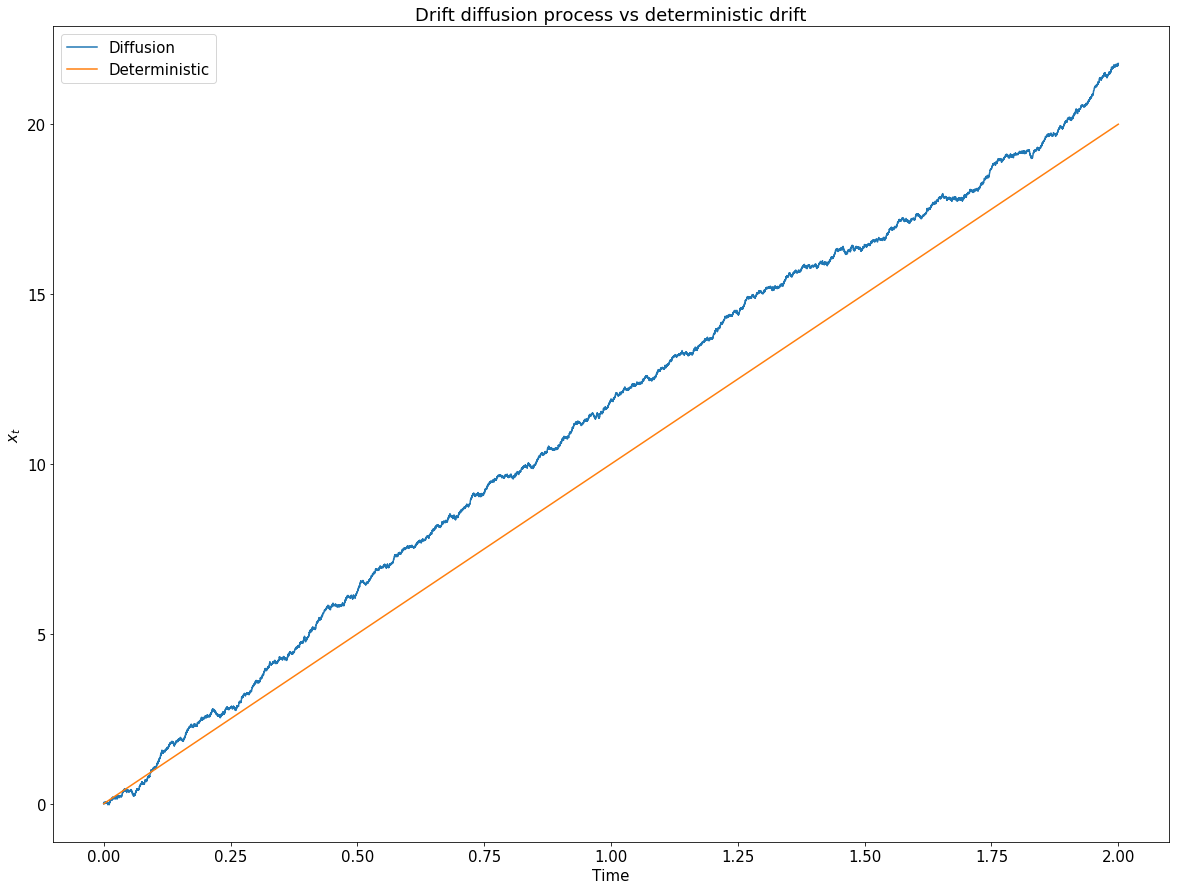

In [16]:
fig = plt.figure(figsize=(20,15))
mpl.rc('font', size=15)
plt.title("Drift diffusion process vs deterministic drift")
plt.xlabel("Time")
plt.ylabel("$x_t$")
plt.plot(ts, x, label="Diffusion")
plt.plot(ts, drift, label="Deterministic")
plt.legend()

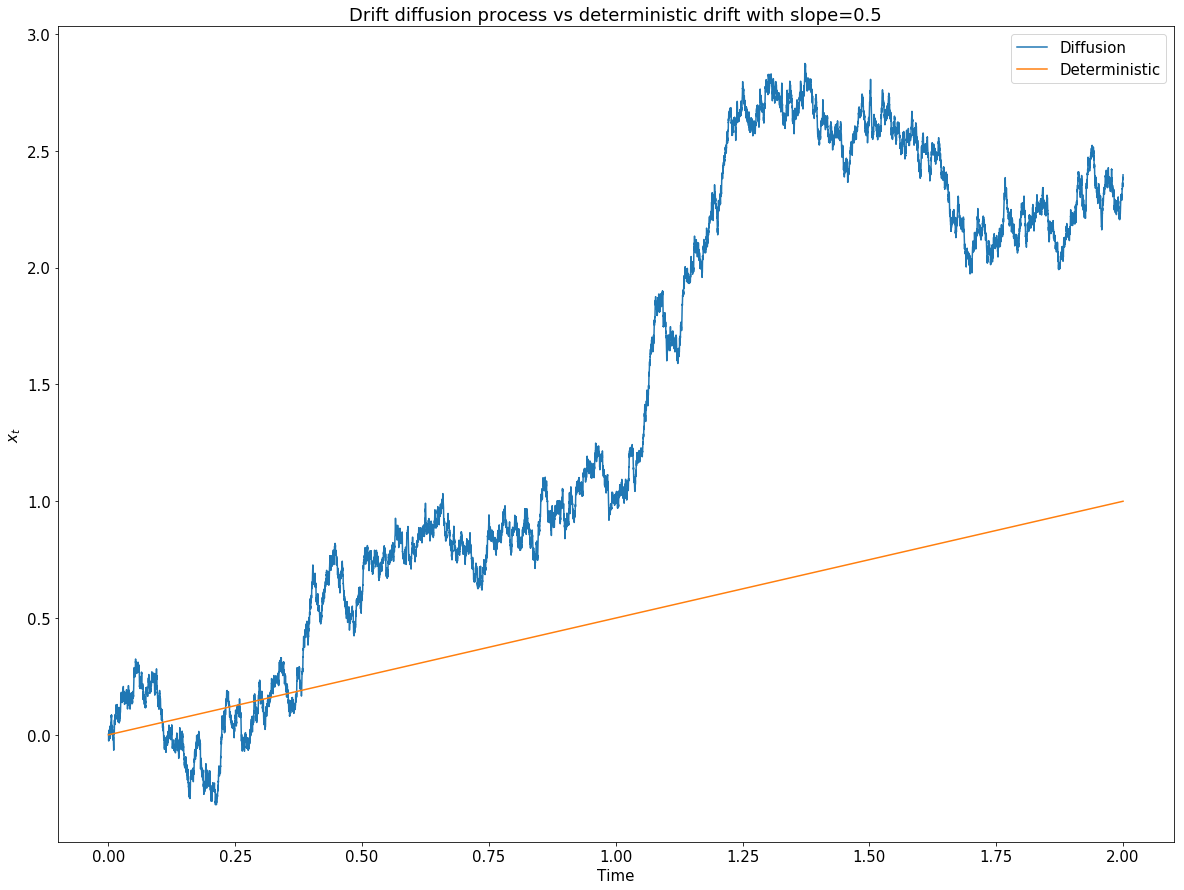

In [17]:
slow_slope = 0.5
x_slow = diffusion_process(slow_slope * dt, dt, ts.size)
drift_slow = slow_slope * ts
fig = plt.figure(figsize=(20,15))
mpl.rc('font', size=15)
plt.title(f"Drift diffusion process vs deterministic drift with slope={slow_slope}")
plt.xlabel("Time")
plt.ylabel("$x_t$")
plt.plot(ts, x_slow, label="Diffusion")
plt.plot(ts, drift_slow, label="Deterministic")
plt.legend()

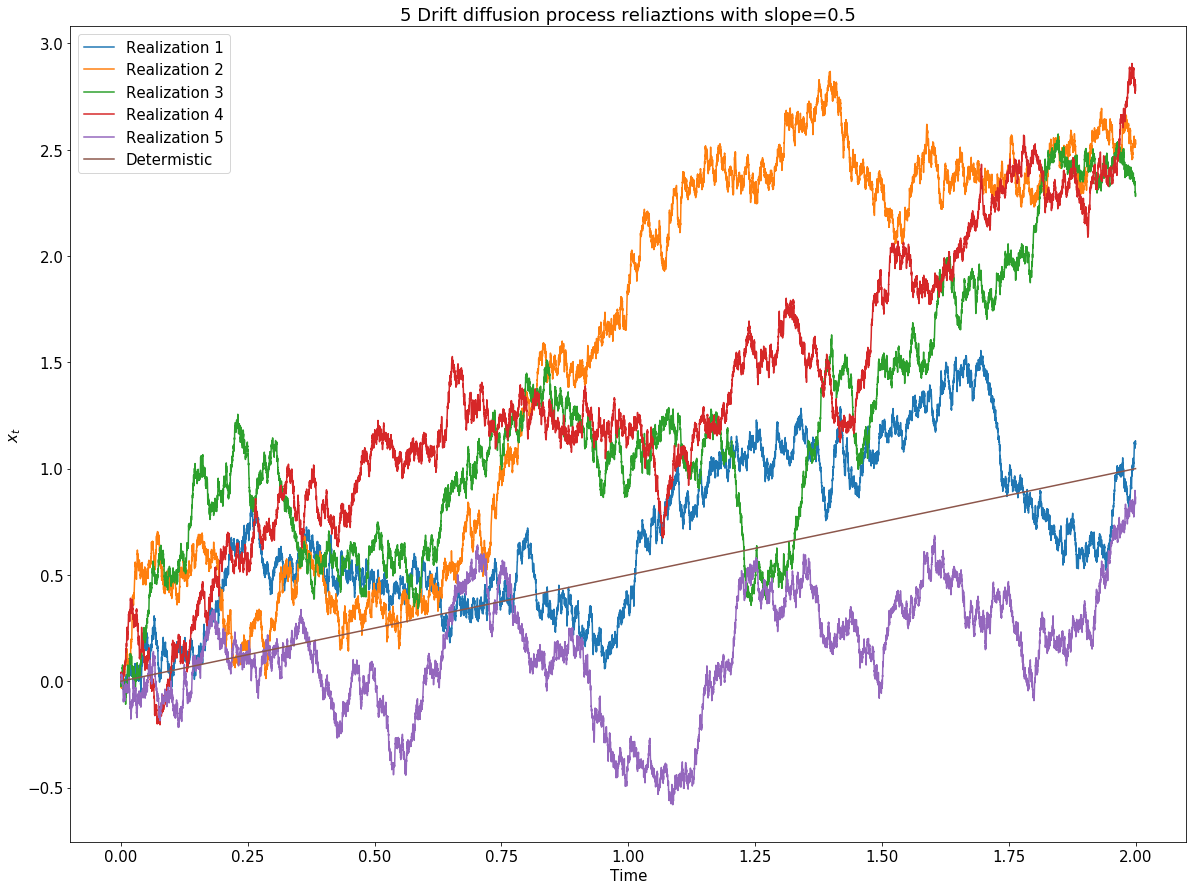

In [18]:
realizations_slow = np.array([diffusion_process(slow_slope * dt, dt, ts.size) for i in range(5)])
labels_slow = [ f'Realization {i+1}' for i in range(5)]
drift_slow = slow_slope * ts
fig = plt.figure(figsize=(20,15))
mpl.rc('font', size=15)
plt.title(f"5 Drift diffusion process reliaztions with slope={slow_slope}")
plt.xlabel("Time")
plt.ylabel("$x_t$")
plt.plot(ts, realizations_slow.T)
plt.plot(ts, drift_slow, label="Deterministic")
plt.legend(labels_slow + ['Determistic'])

## Exercise 3

In [19]:
r = realizations_slow[0]

Text(0, 1.01, 'B = 1')

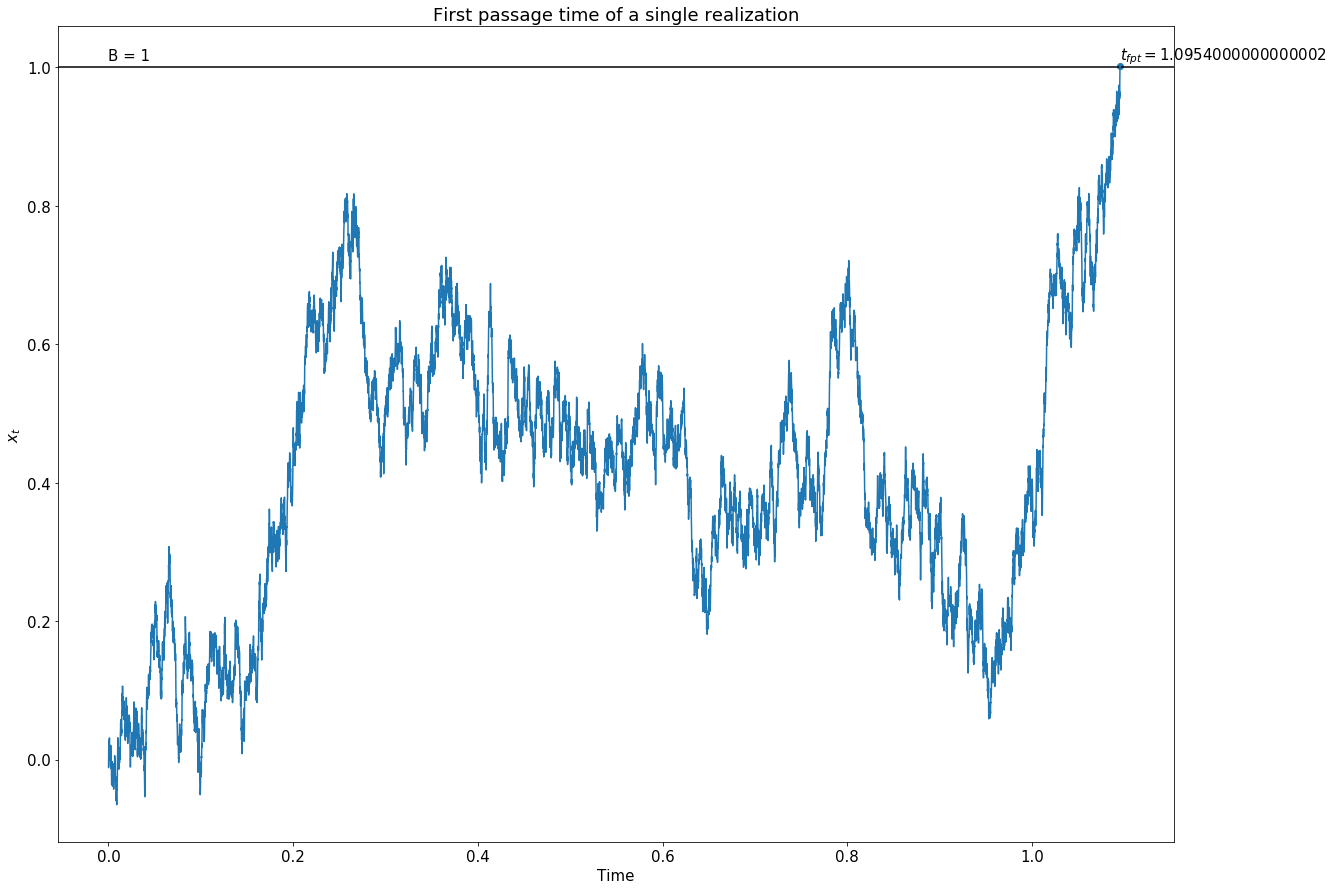

In [20]:
B = 1
first_passage_idx = np.where(np.abs(r) > B)[0][0]
first_passage_time = ts[first_passage_idx]
fig = plt.figure(figsize=(20,15))
mpl.rc('font', size=15)
plt.title(f"First passage time of a single realization")
plt.xlabel("Time")
plt.ylabel("$x_t$")
plt.axhline(y=B, c='k')
plt.plot(ts[:first_passage_idx+1], r[:first_passage_idx+1])
plt.scatter(ts[first_passage_idx], r[first_passage_idx])
plt.text(ts[first_passage_idx], r[first_passage_idx] + 0.01, f'$t_{{fpt}} = {first_passage_time}$')
plt.text(0, 1.01, 'B = 1')

## Exercise 4

In [67]:
getOrDefault = lambda a, i, default: a[i] if i is not None and (-len(a) <= i < len(a)) else default
batch_diffusion_process = lambda slope, count: [ diffusion_process(slope * dt, dt, ts.size) for c in range(count) ]
first_passage_idx = lambda r, B=1: getOrDefault(np.where(np.abs(r) > B)[0], 0, None)
idx2time = lambda i: getOrDefault(ts, i, ts[-1])
first_passage_time = lambda x, B=1: idx2time(first_passage_idx(x, B))
decision = lambda r, B=1: 0.5+ 0.5*np.sign(get(r, first_passage_idx(r, B), 0))
analytical_fpt = lambda slope, B, t_ND=0: B/slope * np.tanh(slope * B) + t_ND
analytical_decision = lambda slope, B: 1/(1 + np.exp(-2 * slope * B)) 

In [30]:
slopes = np.linspace(-10, 10, 20)
batch_realizations = np.array([ batch_diffusion_process(slope, 50) for slope in slopes ])
batch_decisions = np.apply_along_axis(decision, 2, batch_realizations)
batch_fpt = np.apply_along_axis(first_passage_time, 2, batch_realizations)

In [23]:
mean_decision = np.mean(batch_decisions, axis=1)
mean_fpt = np.mean(batch_fpt, axis=1)

Text(0, 0.5, 'Mean First Passage Time')

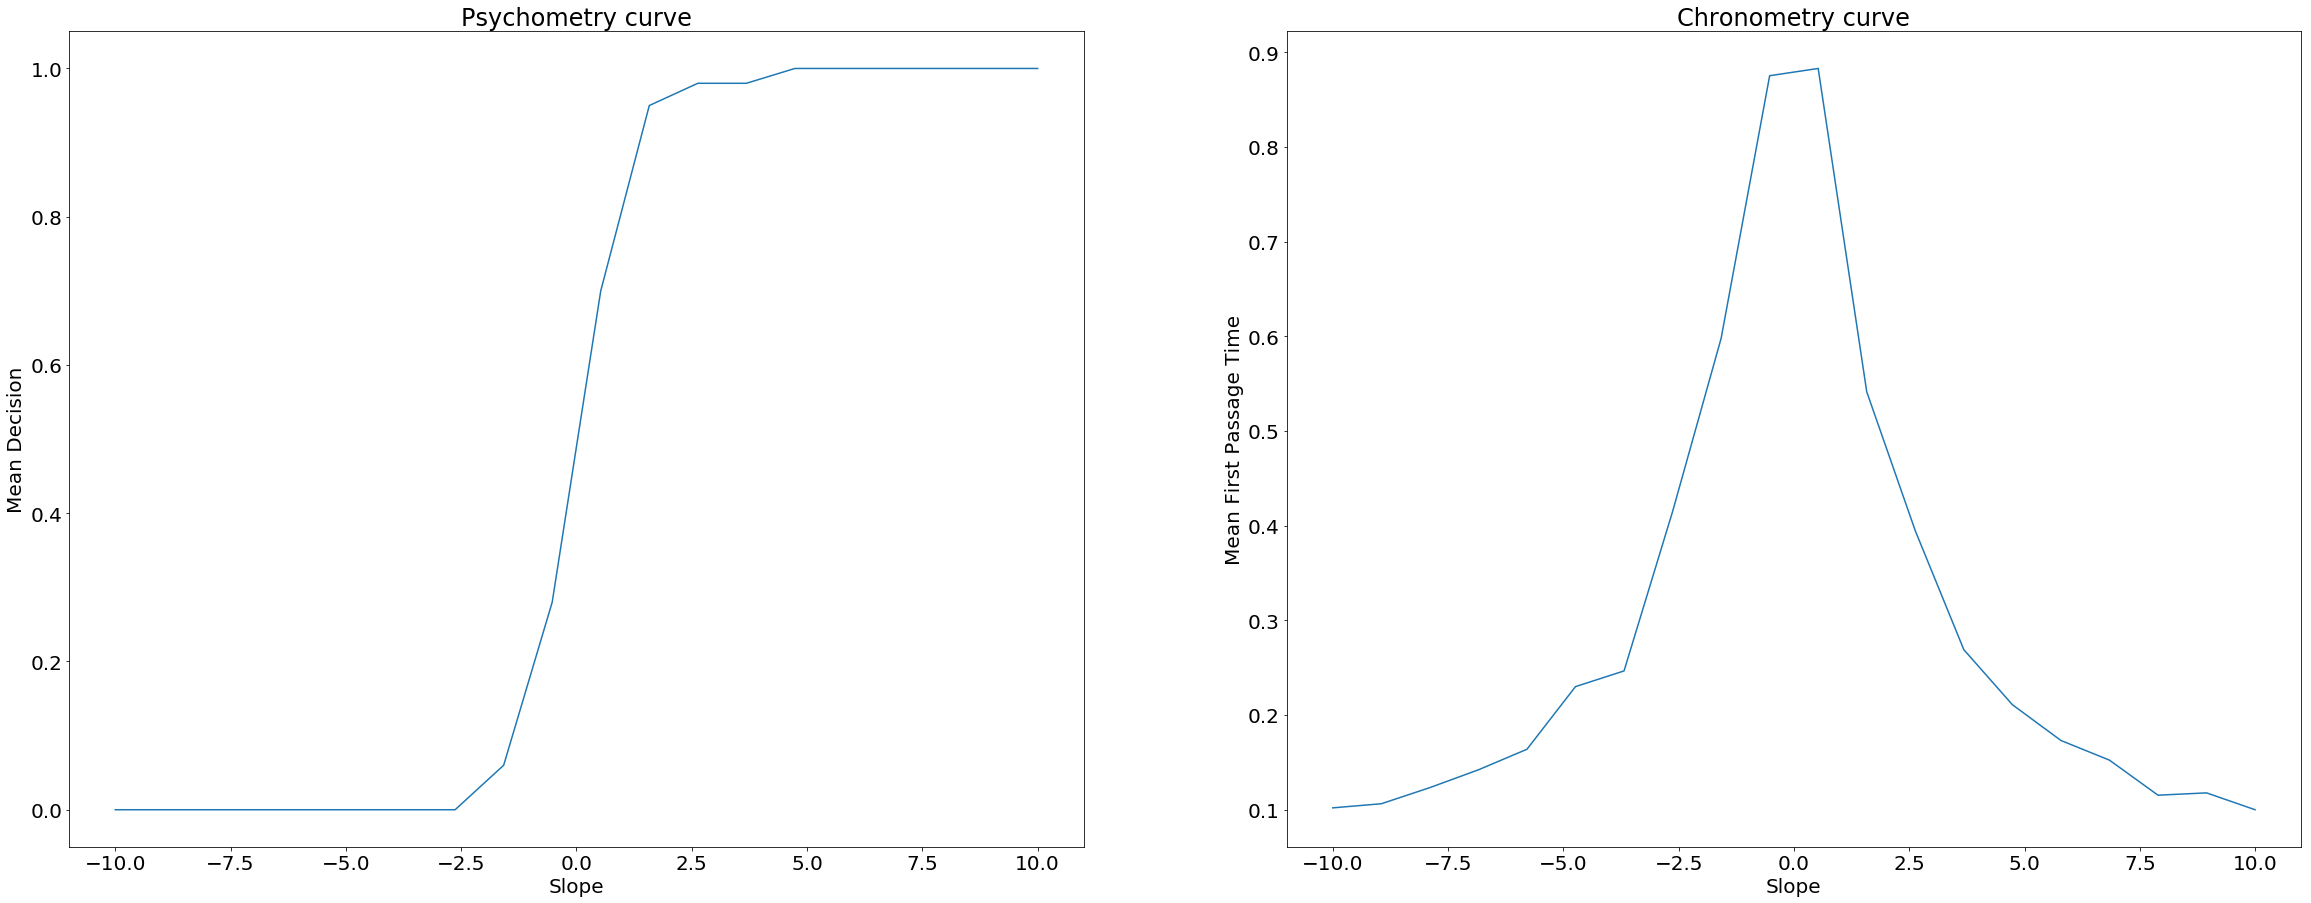

In [24]:
fig = plt.figure(figsize=(40, 15))
mpl.rc('font', size=20)
ax1 = plt.subplot(121)
ax1.plot(slopes, mean_decision)
ax1.set_title('Psychometry curve')
ax1.set_xlabel('Slope')
ax1.set_ylabel('Mean Decision')
ax2 = plt.subplot(122)
ax2.plot(slopes, mean_fpt)
ax2.set_title('Chronometry curve')
ax2.set_xlabel('Slope')
ax2.set_ylabel('Mean First Passage Time')

In [68]:
fpt_fit = analytical_fpt(slopes, B)
decision_fit = analytical_decision(slopes, B)

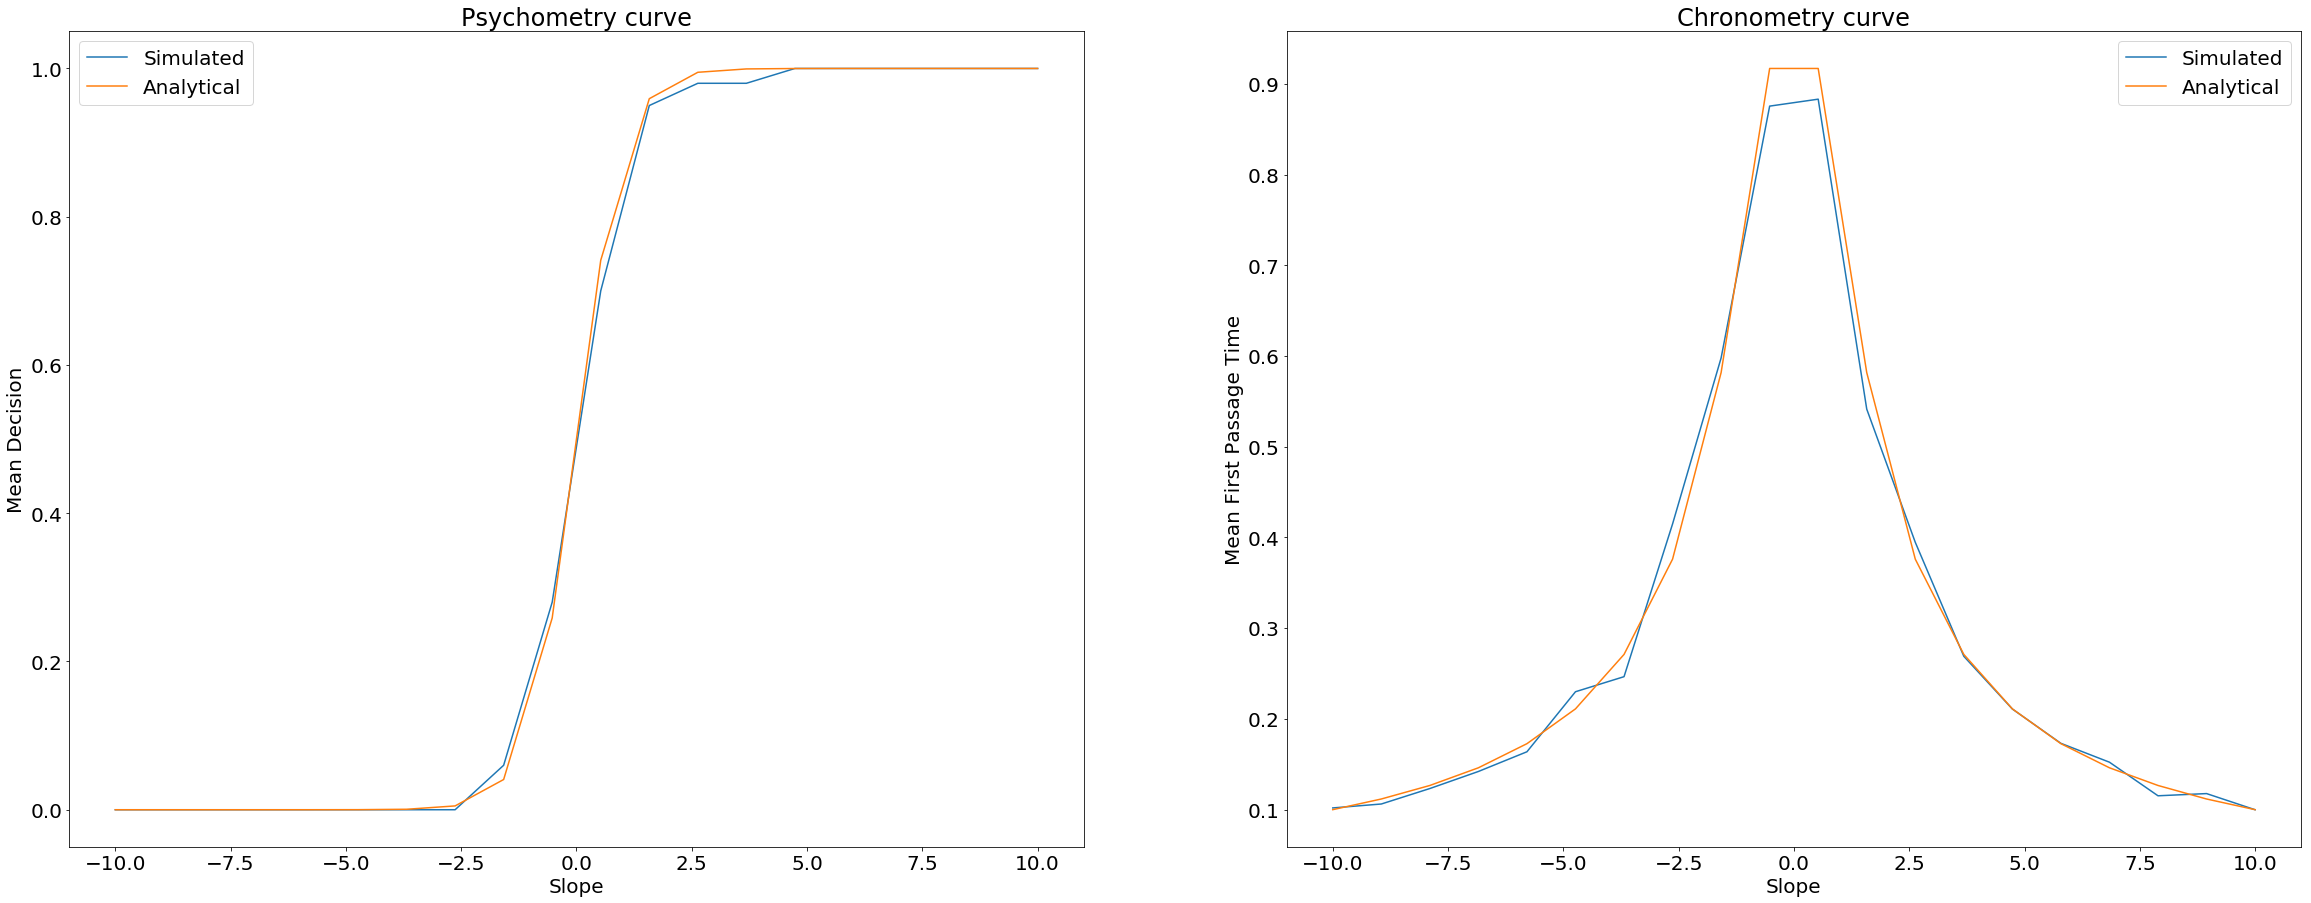

In [69]:
fig = plt.figure(figsize=(40, 15))
mpl.rc('font', size=20)
ax1 = plt.subplot(121)
ax1.plot(slopes, mean_decision, label='Simulated')
ax1.plot(slopes, decision_fit, label='Analytical')
ax1.set_title('Psychometry curve')
ax1.set_xlabel('Slope')
ax1.set_ylabel('Mean Decision')
ax1.legend()
ax2 = plt.subplot(122)
ax2.plot(slopes, mean_fpt, label='Simulated')
ax2.plot(slopes, fpt_fit, label='Analytical')
ax2.set_title('Chronometry curve')
ax2.set_xlabel('Slope')
ax2.set_ylabel('Mean First Passage Time')
ax2.legend()

## Exercise 5

In [60]:
from functools import partial
bounds = [0.62, 0.62, 0.74, 0.7, 0.33]
kappa = [40.4, 5.7, 19.2, 24.3, 24.6]
C0 = [0.007, -0.053, -0.001, 0.018, -0.05]
t_ND = [0.131, 0.562, 0.79, 0.227, 1.463]
subjects_n = len(C0)
coherences = np.linspace(-0.5, 0.5, 20)

In [37]:
subject_slopes = lambda i: kappa[i] * (coherences - C0[i])

In [61]:
def subject_fpt_decision(i, trials=30):
    batch_realizations = np.array([ batch_diffusion_process(slope, trials) for slope in subject_slopes(i) ])
    batch_decisions = np.apply_along_axis(partial(decision, B=bounds[i]), 2, batch_realizations)
    batch_fpt = np.apply_along_axis(partial(first_passage_time, B=bounds[i]), 2, batch_realizations)
    
    mean_decision = np.mean(batch_decisions, axis=1)
    mean_fpt = np.mean(batch_fpt, axis=1) + t_ND[i]
    
    return mean_fpt, mean_decision

In [64]:
subject_fpts, subject_decisions = zip(*[subject_fpt_decision(i) for i in range(subjects_n)])

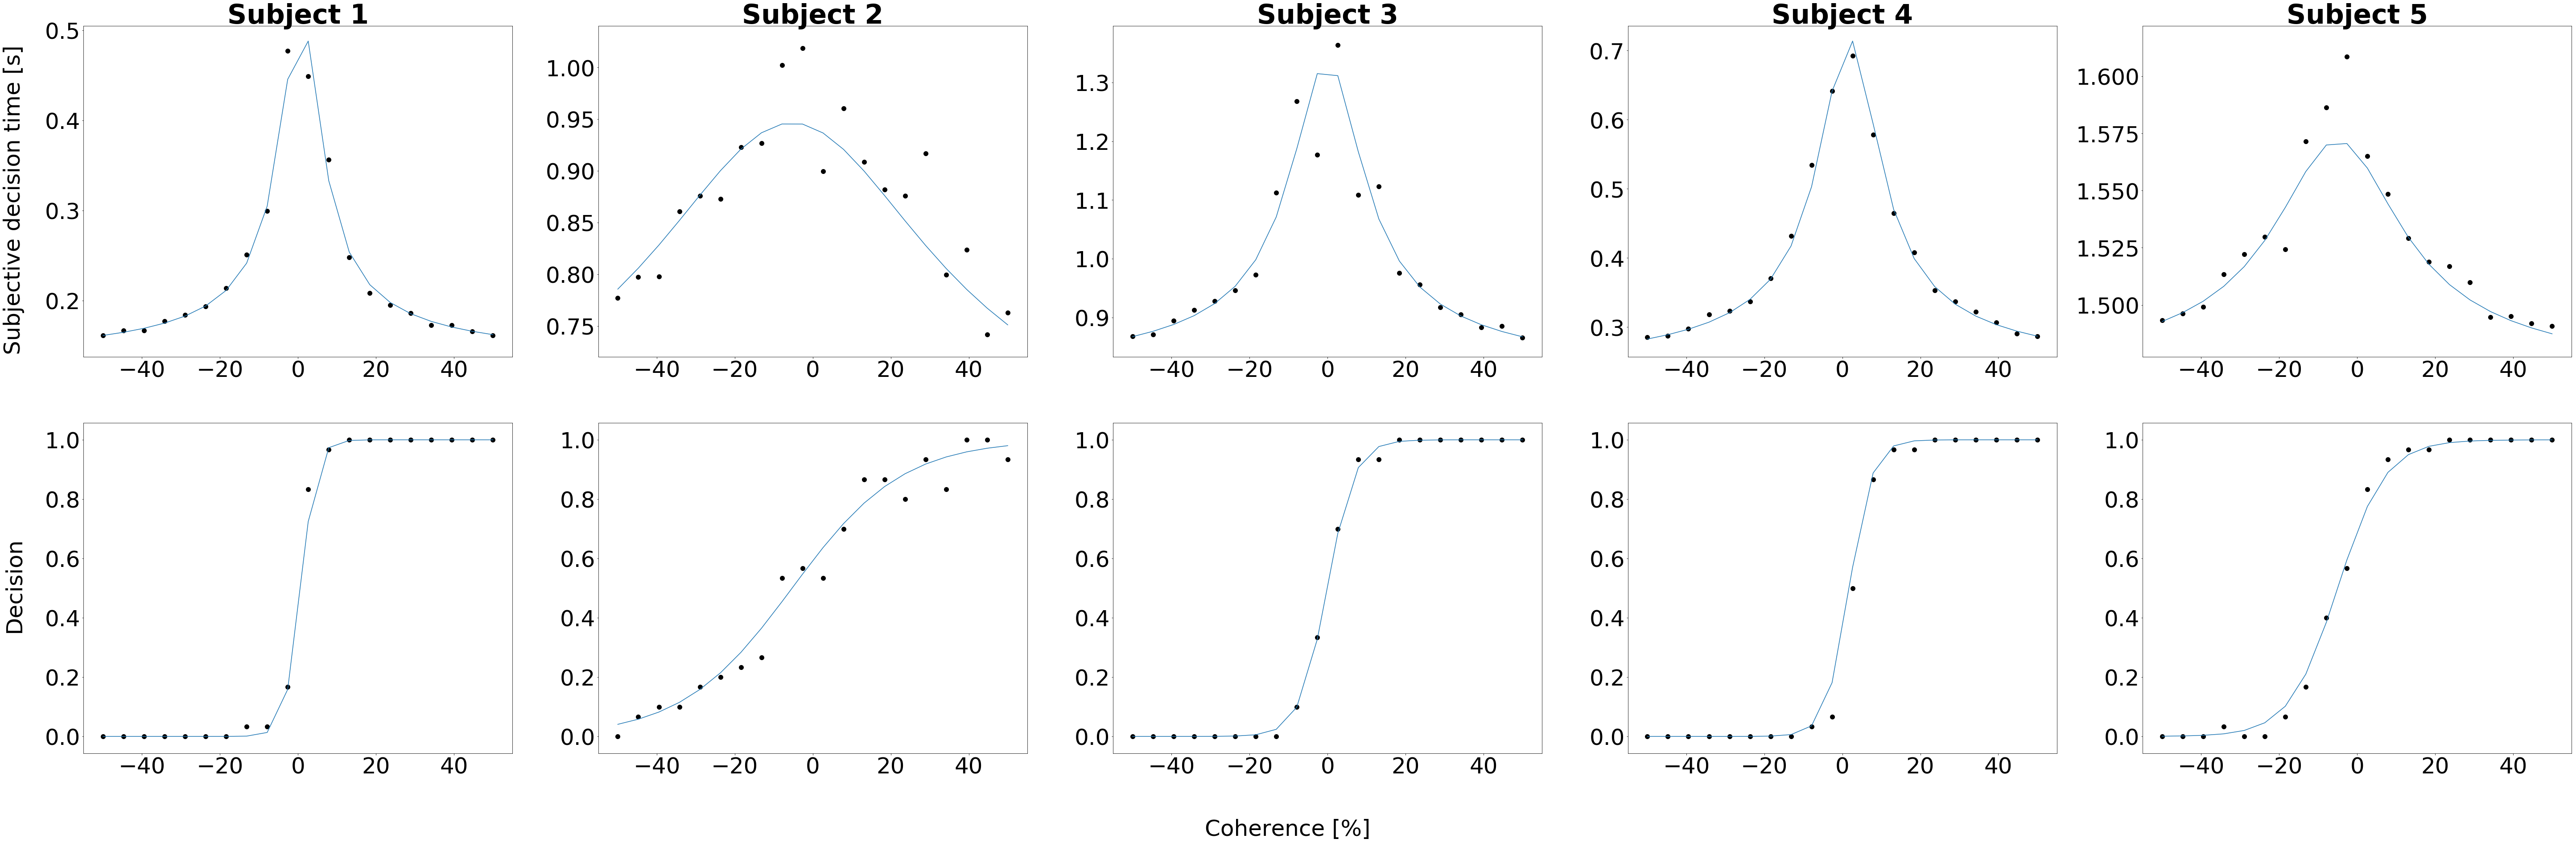

In [95]:
fig = plt.figure(figsize=(100, 30))
mpl.rc('font', size=50)
for subject, fpt in enumerate(subject_fpts):
    ax = plt.subplot(2, 5, subject+1)
    ax.scatter(100*coherences, fpt, s=100, c='k')
    ax.plot(100*coherences, analytical_fpt(subject_slopes(subject), bounds[subject], t_ND[subject]))
    ax.set_title(f"Subject {subject+1}", fontweight='bold')
for subject, decision in enumerate(subject_decisions):
    ax = plt.subplot(2, 5, 5 + subject+1)
    ax.scatter(100*coherences, decision, s=100, c='k')
    ax.plot(100*coherences, analytical_decision(subject_slopes(subject), bounds[subject]))

fig.text(0.5, 0.04, 'Coherence [%]', ha='center')
fig.text(0.1, 0.7, 'Subjective decision time [s]', va='center', rotation='vertical')
fig.text(0.1, 0.3, 'Decision', va='center', rotation='vertical')
plt.show()